In [22]:
# this script plots the global distribution of the Coral Hydro2k Seawater Database points at:
    # the surface (above 5m), subsurface (below 5m), as well as datasets with evaporation flags and/or additional salinity data

In [23]:
# import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import numpy as np

In [3]:
# specify location of data
home = '~/Downloads/'

# load in database
    # You will get an error that says "DtypeWarning: Columns (9,10,13,16,20,34,55) have mixed types."
    # This is because those columns have a mixture of strings and NaN values. This is okay and will not affect plotting the data. 
seawater_database = pd.read_csv(home + 'CoralHydro2k_Seawaterd18O.csv')                               

/var/folders/19/_rflynwd29n4cl17cjzpq6q80000gn/T/ipykernel_74360/1156518757.py:8: DtypeWarning: Columns (10,13,16,20,33,54) have mixed types. Specify dtype option on import or set low_memory=False.
  seawater_database = pd.read_csv(home + 'CoralHydro2k_Seawaterd18O_250122.csv')


In [4]:
# check out all of the database columns
seawater_database.columns

Index(['CoralHydro2k ID (Level 1)', 'QC (initials)',
       'Site name or geographic area (Level 2)\n\n',
       'Location type (open ocean, coastal, bay, lagoon, estuary, enclosed sea, marginal/semi-enclosed sea, etc) (Level 5) (not standardized vocab)',
       'Location description (E.g. description of major water masses, currents/upwelling, surface water balance, any groundwater or riverine input, distance from coastline (if coastal site), depth and geometry of bay or lagoon, and description of co-located coral reef site if applicable) (Level 5)',
       'Collection Year (Level 1)', 'Collection Month (Level 1)',
       'Collection Day (Level 3)',
       'Collection time (UTC; 24-hr; hh:mm:ss.sss) (Level 3)',
       'Collection Date Notes (Level 4)',
       'Water isotope analysis date (Level 3)',
       'Latitude (decimal degrees N)* (Level 1)',
       'Longitude (decimal degrees E)* (Level 1)', 'Location Notes (Level 4)',
       'Depth (Level 1)', 'Depth units (Level 1)', 'Depth no

In [5]:
# combine year, month, day columns of database
all_years = seawater_database['Collection Year (Level 1)']
all_months = seawater_database['Collection Month (Level 1)']
all_days = seawater_database['Collection Day (Level 3)']
date_dataframe = pd.DataFrame({'year':all_years,'month':all_months,'day':all_days})
all_dates = pd.to_datetime(date_dataframe, format='%Y-%M-%D')

# add new 'Date' column to seawater database
seawater_database['CollectionDate'] = all_dates

all_times = seawater_database['Collection time (UTC; 24-hr; hh:mm:ss.sss) (Level 3)']

Text(0.5, 1.0, '$δ^{18}$$O_{sw}$ (all depths)')

/opt/anaconda3/lib/python3.8/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/opt/anaconda3/lib/python3.8/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/opt/anaconda3/lib/python3.8/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


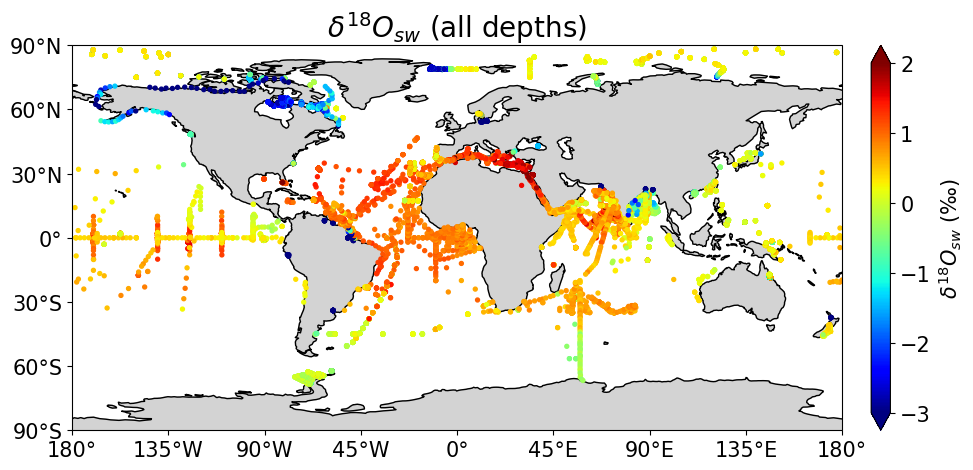

In [25]:
# plot d18O datapoints (all)

# Choose a set of depths to plot
df_all = seawater_database   # all depths
#df_all = seawater_database[seawater_database['Depth (Level 1)']<=5]  # upper 5m
#df_all = seawater_database[seawater_database['Depth (Level 1)']>5]  # below 5m

# Rename columns
df_all = df_all.rename(columns={"Collection Year (Level 1)": "yr", "Collection Month (Level 1)": "mo",
                   "Latitude (decimal degrees N)* (Level 1)": "lat", 
                   "Longitude (decimal degrees E)* (Level 1)": "lon", "Depth (Level 1)": "depth",
                   "d18O value* (Level 1)": "d18O", 
                   "Publication Citation* (Level 4)": "pubcit", "First Author": "firstauth", "Publication Year": "pubyr", 
                   "Site name or geographic area (Level 2)\n\n": "site", "Upper 5m? (y/n)": "upper5m",
                   "Data Location (Is data publicly available and where; e.g., Hidden, GISS, PANGAEA, etc.)": "status"})

all_lats = df_all['lat']
all_lons = df_all['lon']
all_depths = df_all['depth']
all_d18o = df_all['d18O']

fig1, ax1 = plt.subplots(figsize=(15,5), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})
ax1.set_global()
ax1.coastlines()
ax1.add_feature(cfeature.LAND, color='lightgrey')
ax1.set_xticks([-180,-135,-90,-45,0,45,90,135,180])
ax1.set_yticks([-90,-60,-30,0,30,60,90])
ax1.tick_params(labelsize=15)
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())
# scatterplot where color of marker is based on d18O value, d18O values range from -3 to 2 per mille
all_plot = ax1.scatter(all_lons, all_lats, c=all_d18o, s=8, vmin=-3, vmax=2, cmap='jet', transform=ccrs.PlateCarree())
ax1_cbar = plt.colorbar(all_plot, extend='both', pad =0.025)
ax1_cbar.set_label('$δ^{18}$$O_{sw}$ (‰)', fontsize=15)
ax1_cbar.ax.tick_params(labelsize=15)

plt.title('$δ^{18}$$O_{sw}$ (all depths)', fontsize=20)
#plt.title('Surface $δ^{18}$$O_{sw}$ (Upper 5m)', fontsize=20)
#plt.title('$δ^{18}$$O_{sw}$ (>5m depth)', fontsize=20)

Text(0.5, 1.0, '$δ^{18}$$O_{sw}$ with Evaporation Flag')

/opt/anaconda3/lib/python3.8/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/opt/anaconda3/lib/python3.8/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/opt/anaconda3/lib/python3.8/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


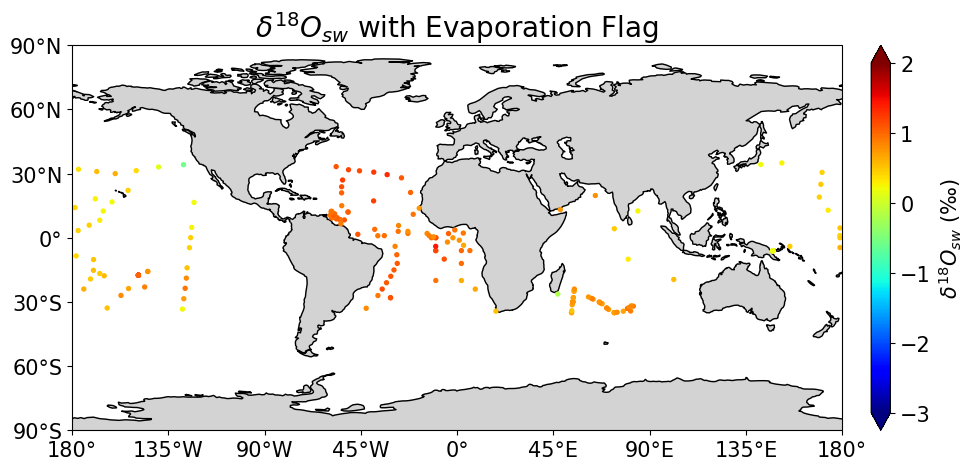

In [26]:
# plot d18O datapoints that have evaporation flags

# Choose a set of depths to plot
df_all = seawater_database                                           # all depths
#df_all = seawater_database[seawater_database['Depth (Level 1)']<=5]  # upper 5m
#df_all = seawater_database[seawater_database['Depth (Level 1)']>5]  # below 5m

# Select only data with evaporation flag
df_flags = df_all[df_all['Evaporation flag (Level 1)']=='Y']

# Rename columns
df_flags = df_flags.rename(columns={"Collection Year (Level 1)": "yr", "Collection Month (Level 1)": "mo",
                   "Latitude (decimal degrees N)* (Level 1)": "lat", 
                   "Longitude (decimal degrees E)* (Level 1)": "lon", "Depth (Level 1)": "depth",
                   "d18O value* (Level 1)": "d18O", 
                   "Publication Citation* (Level 4)": "pubcit", "First Author": "firstauth", "Publication Year": "pubyr", 
                   "Site name or geographic area (Level 2)\n\n": "site", "Upper 5m? (y/n)": "upper5m",
                   "Data Location (Is data publicly available and where; e.g., Hidden, GISS, PANGAEA, etc.)": "status"})

flags_lats = df_flags['lat']
flags_lons = df_flags['lon']
flags_depths = df_flags['depth']
flags_d18o = df_flags['d18O']

fig3, ax3 = plt.subplots(figsize=(15,5), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})
ax3.set_global()
ax3.coastlines()
ax3.add_feature(cfeature.LAND, color='lightgrey')
ax3.set_xticks([-180,-135,-90,-45,0,45,90,135,180])
ax3.set_yticks([-90,-60,-30,0,30,60,90])
ax3.tick_params(labelsize=15)
ax3.xaxis.set_major_formatter(LongitudeFormatter())
ax3.yaxis.set_major_formatter(LatitudeFormatter())
flags_plot = ax3.scatter(flags_lons, flags_lats, c=flags_d18o, s=8, vmin=-3, vmax=2, cmap='jet', transform=ccrs.PlateCarree())
ax3_cbar = plt.colorbar(flags_plot, extend='both', pad =0.025)
ax3_cbar.set_label('$δ^{18}$$O_{sw}$ (‰)', fontsize=15)
ax3_cbar.ax.tick_params(labelsize=15)

plt.title('$δ^{18}$$O_{sw}$ with Evaporation Flag', fontsize=20)

Text(0.5, 1.0, '$δ^{18}$$O_{sw}$ with Salinity Data')

/opt/anaconda3/lib/python3.8/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/opt/anaconda3/lib/python3.8/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/opt/anaconda3/lib/python3.8/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


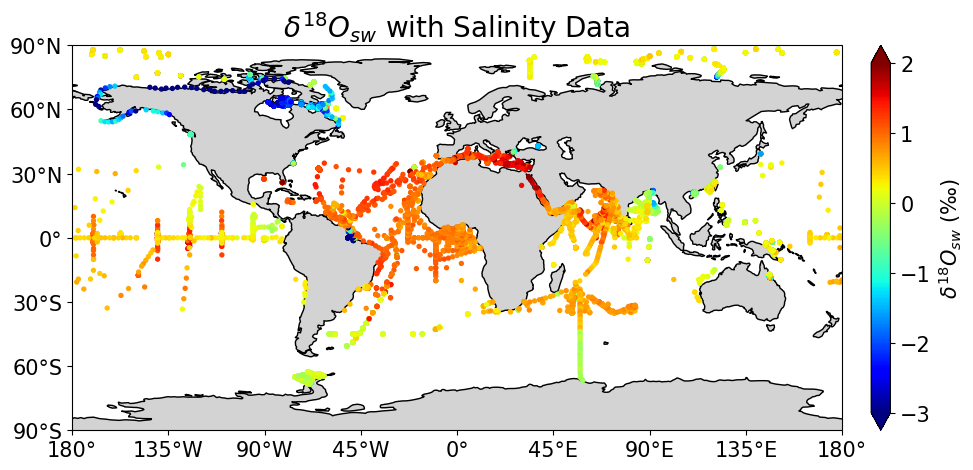

In [27]:
# plot d18O datapoints that have salinity data

# Choose a set of depths to plot
df_all = seawater_database                                           # all depths
#df_all = seawater_database[seawater_database['Depth (Level 1)']<=5]  # upper 5m
#df_all = seawater_database[seawater_database['Depth (Level 1)']>5]  # below 5m

# Select only data with paired salinity data
df_sal = df_all[df_all['Salinity value (Level 3)'].notna()]

# Rename columns
df_sal = df_sal.rename(columns={"Collection Year (Level 1)": "yr", "Collection Month (Level 1)": "mo",
                   "Latitude (decimal degrees N)* (Level 1)": "lat", 
                   "Longitude (decimal degrees E)* (Level 1)": "lon", "Depth (Level 1)": "depth",
                   "d18O value* (Level 1)": "d18O", 
                   "Publication Citation* (Level 4)": "pubcit", "First Author": "firstauth", "Publication Year": "pubyr", 
                   "Site name or geographic area (Level 2)\n\n": "site", "Upper 5m? (y/n)": "upper5m",
                   "Data Location (Is data publicly available and where; e.g., Hidden, GISS, PANGAEA, etc.)": "status"})

sal_lats = df_sal['lat']
sal_lons = df_sal['lon']
sal_depths = df_sal['depth']
sal_d18o = df_sal['d18O']

fig4, ax4 = plt.subplots(figsize=(15,5), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})
ax4.set_global()
ax4.coastlines()
ax4.add_feature(cfeature.LAND, color='lightgrey')
ax4.set_xticks([-180,-135,-90,-45,0,45,90,135,180])
ax4.set_yticks([-90,-60,-30,0,30,60,90])
ax4.tick_params(labelsize=15)
ax4.xaxis.set_major_formatter(LongitudeFormatter())
ax4.yaxis.set_major_formatter(LatitudeFormatter())
sal_plot = ax4.scatter(sal_lons, sal_lats, c=sal_d18o, s=8, vmin=-3, vmax=2, cmap='jet', transform=ccrs.PlateCarree())
ax4_cbar = plt.colorbar(sal_plot, extend='both', pad =0.025)
ax4_cbar.set_label('$δ^{18}$$O_{sw}$ (‰)', fontsize=15)
ax4_cbar.ax.tick_params(labelsize=15)

plt.title('$δ^{18}$$O_{sw}$ with Salinity Data', fontsize=20)

9769


Text(0.5, 1.0, '$δ^{18}$$O_{sw}$ with d2H Data')

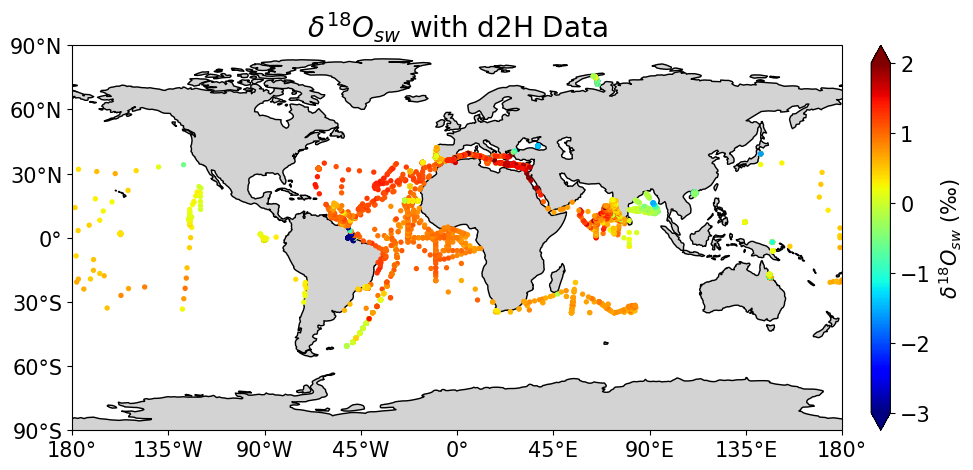

In [28]:
# plot d18O datapoints that have d2H data
seawater_database_d2H = seawater_database[seawater_database['d2H value (Level 3)'].notna()]
d2H_lats = seawater_database_d2H['Latitude (decimal degrees N)* (Level 1)']
d2H_lons = seawater_database_d2H['Longitude (decimal degrees E)* (Level 1)']
d2H_depths = seawater_database_d2H['Depth (Level 1)']
d2H_d18o = seawater_database_d2H['d18O value* (Level 1)']

print(len(d2H_d18o))    # This is the number of hidden data points

fig4, ax4 = plt.subplots(figsize=(15,5), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})
ax4.set_global()
ax4.coastlines()
ax4.add_feature(cfeature.LAND, color='lightgrey')
ax4.set_xticks([-180,-135,-90,-45,0,45,90,135,180])
ax4.set_yticks([-90,-60,-30,0,30,60,90])
ax4.tick_params(labelsize=15)
ax4.xaxis.set_major_formatter(LongitudeFormatter())
ax4.yaxis.set_major_formatter(LatitudeFormatter())
d2H_plot = ax4.scatter(d2H_lons, d2H_lats, c=d2H_d18o, s=8, vmin=-3, vmax=2, cmap='jet', transform=ccrs.PlateCarree())
ax4_cbar = plt.colorbar(d2H_plot, extend='both', pad =0.025)
ax4_cbar.set_label('$δ^{18}$$O_{sw}$ (‰)', fontsize=15)
ax4_cbar.ax.tick_params(labelsize=15)
plt.title('$δ^{18}$$O_{sw}$ with d2H Data', fontsize=20)

18598


Text(0.5, 1.0, 'Sample collection dates of $δ^{18}$$O_{sw}$')

/opt/anaconda3/lib/python3.8/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/opt/anaconda3/lib/python3.8/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/opt/anaconda3/lib/python3.8/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


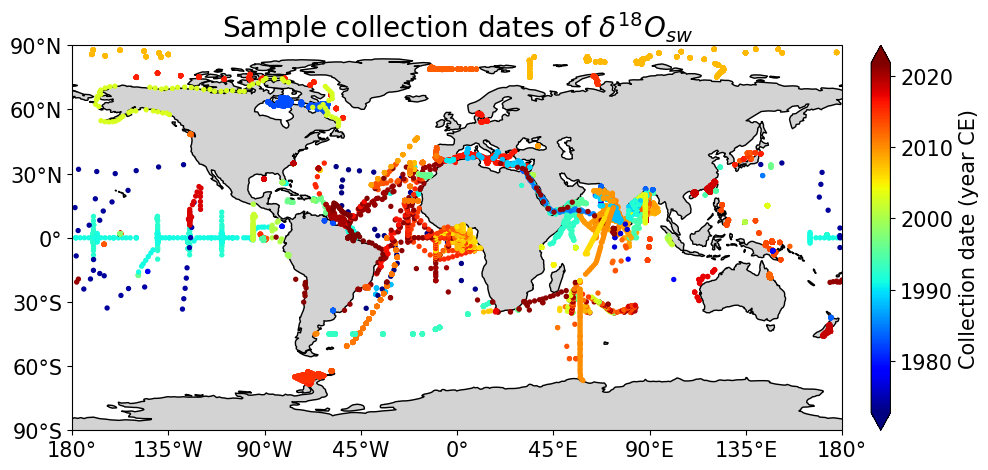

In [32]:
# Plot the sample collection date of each datapoint

# Choose a set of depths to plot
df_all = seawater_database   # all depths
#df_all = seawater_database[seawater_database['Depth (Level 1)']<=5]  # upper 5m
#df_all = seawater_database[seawater_database['Depth (Level 1)']>5]  # below 5m

# Rename columns
df_all = df_all.rename(columns={"Collection Year (Level 1)": "yr", "Collection Month (Level 1)": "mo",
                   "Latitude (decimal degrees N)* (Level 1)": "lat", 
                   "Longitude (decimal degrees E)* (Level 1)": "lon", "Depth (Level 1)": "depth",
                   "d18O value* (Level 1)": "d18O", 
                   "Publication Citation* (Level 4)": "pubcit", "First Author": "firstauth", "Publication Year": "pubyr", 
                   "Site name or geographic area (Level 2)\n\n": "site", "Upper 5m? (y/n)": "upper5m"})

all_lats = df_all['lat']
all_lons = df_all['lon']
all_depths = df_all['depth']
all_d18o = df_all['d18O']

print(len(all_d18o))    # This is the number of data points

all_years = np.array(df_all["yr"])
all_months = np.array(df_all["mo"])
all_fryr = all_years+all_months/12.  # fractional year

fig1, ax1 = plt.subplots(figsize=(15,5), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})
ax1.set_global()
ax1.coastlines()
ax1.add_feature(cfeature.LAND, color='lightgrey')
ax1.set_xticks([-180,-135,-90,-45,0,45,90,135,180])
ax1.set_yticks([-90,-60,-30,0,30,60,90])
ax1.tick_params(labelsize=15)
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())
# scatterplot where color of marker is based on d18O value, d18O values range from -3 to 2 per mille
all_plot = ax1.scatter(all_lons, all_lats, c=all_fryr, s=8, cmap='jet', transform=ccrs.PlateCarree())
ax1_cbar = plt.colorbar(all_plot, extend='both', pad =0.025)
ax1_cbar.set_label('Collection date (year CE)', fontsize=15)
ax1_cbar.ax.tick_params(labelsize=15)
plt.title('Sample collection dates of $δ^{18}$$O_{sw}$', fontsize=20)